<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/Titanic_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape


(891, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


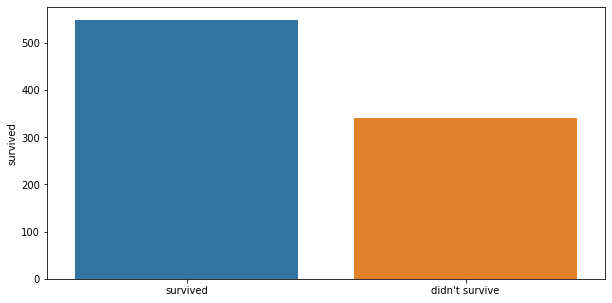

In [7]:
plt.figure(figsize=(10, 5));
survived = df.survived.value_counts()
survived.index = ['survived', "didn't survive"]
sns.barplot(survived.index, survived);

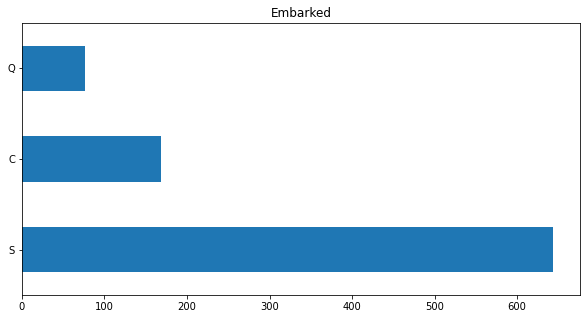

In [8]:
plt.figure(figsize=(10, 5))
df.embarked.value_counts().plot.barh();
plt.title('Embarked');

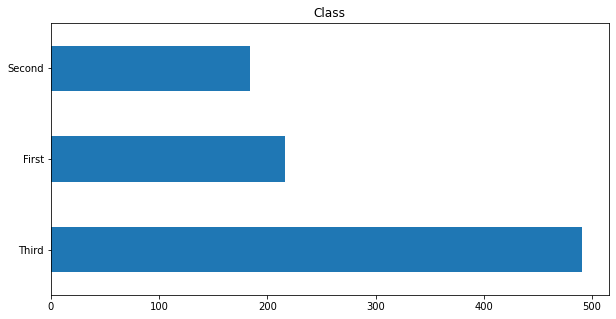

In [9]:
plt.figure(figsize=(10, 5))
df['class'].value_counts().plot.barh();
plt.title('Class');

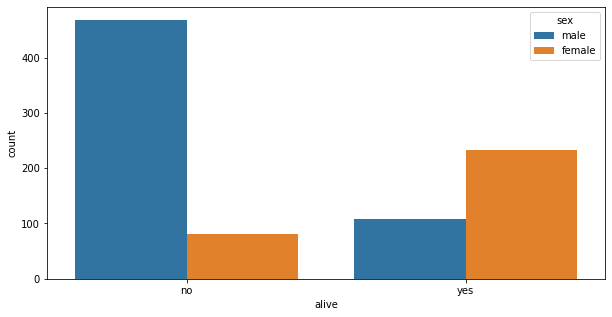

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alive', data=df, hue='sex');

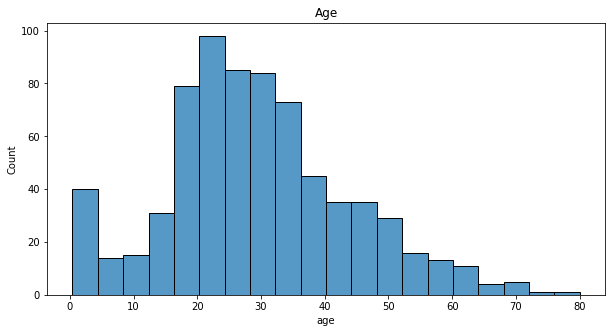

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(x='age', data=df, bins=20);
plt.title('Age');

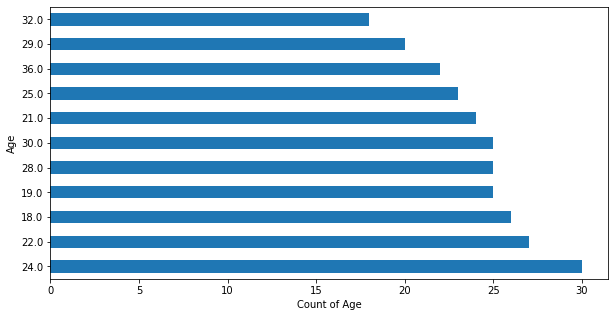

In [12]:
plt.figure(figsize=(10, 5))
df.age.value_counts().nlargest(11).plot.barh();
plt.xlabel('Count of Age')
plt.ylabel('Age');

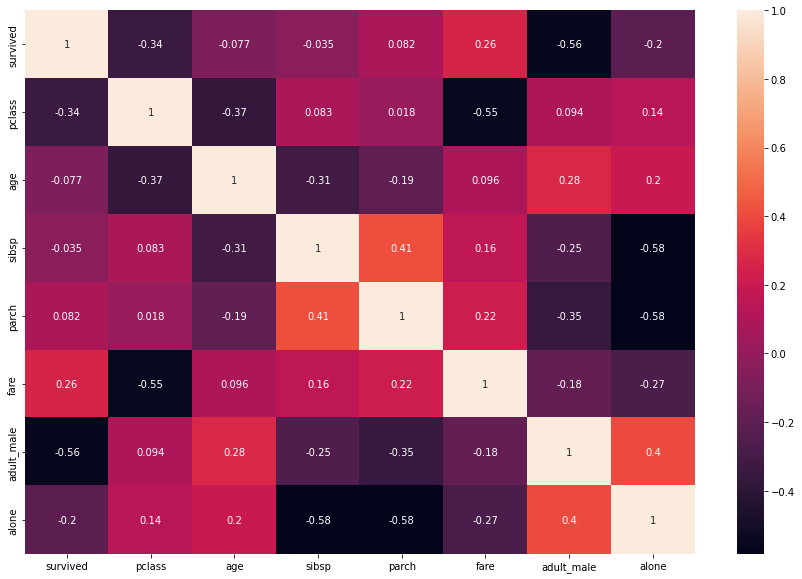

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

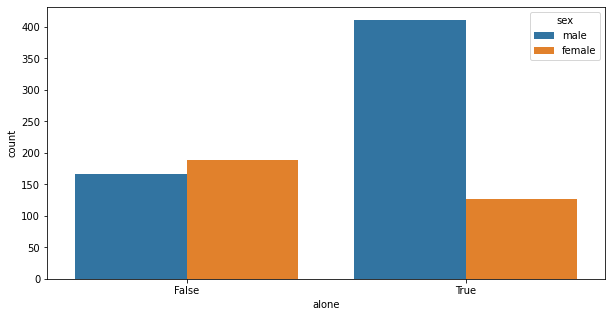

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alone', data=df, hue='sex');

In [15]:
df['embarked'].fillna(value=df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(value=df['embark_town'].mode()[0], inplace=True)

In [16]:
def get_label_class(val):
    if val == 'First':
        val = 0
    elif val == 'Second':
        val = 1
    elif val == 'Third':
        val = 2
    return val

def get_label_embarked(val):
    if val == 'S':
        val = 0
    elif val == 'C':
        val = 1
    elif val == 'Q':
        val = 2
    return val

def get_label_embarktown(val):
    if val == 'Southampton':
        val = 0
    elif val == 'Cherbourg':
        val = 1
    elif val == 'Queenstown':
        val = 2
    return val

In [17]:
df['sex'] = np.where(df['sex'] == 'male', 1, 0)

df['class'] = df['class'].map(get_label_class) 

df.drop(['who'], axis=1, inplace=True)

df['embarked'] = df['embarked'].map(get_label_embarked)

df['adult_male'] = np.where(df['adult_male'] == True, 1, 0)

df['embark_town'] = df['embark_town'].map(get_label_embarktown)

df.drop(['deck'], axis=1, inplace=True)

df.drop(['alive'], axis=1, inplace=True)

df['alone'] = np.where(df['alone'] == True, 1, 0)

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,0,2,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,2,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,2,1,0,1


In [19]:
upper_value = df['age'].mean() + (3 * df.age.std())
lower_value = df['age'].mean() - (3 * df.age.std())

print(upper_value)
print(lower_value)

73.27860964406094
-13.880374349943303


In [20]:
df.loc[df.age > upper_value, 'age'] = upper_value

In [21]:
df.drop(['adult_male', 'embarked'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


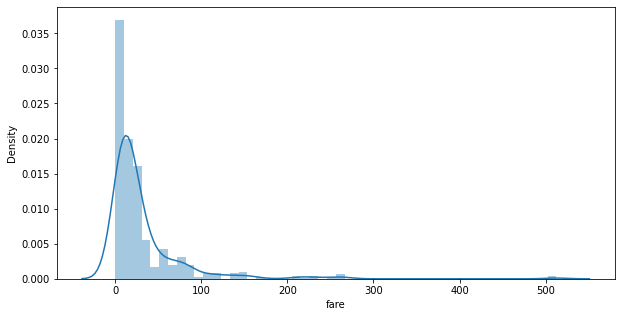

In [22]:
plt.figure(figsize=(10, 5))
sns.distplot(df.fare);

In [23]:
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

lower_value = df.fare.quantile(0.25) - (IQR * 1.5)
upper_value =  df.fare.quantile(0.75) + (IQR * 1.5)

# lower_value_extreme = df.fare.quantile
print(lower_value)
print(upper_value)

-26.724
65.6344


In [24]:
df.loc[df.fare > upper_value, 'fare'] = upper_value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


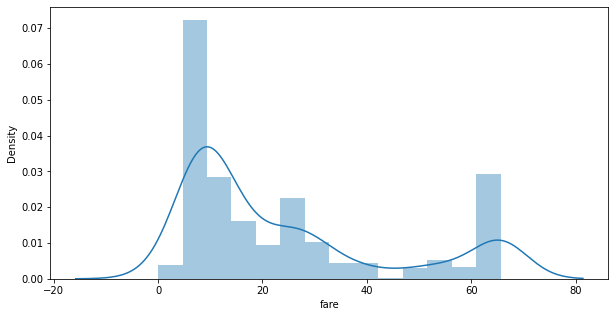

In [25]:
plt.figure(figsize=(10, 5))
sns.distplot(df.fare);

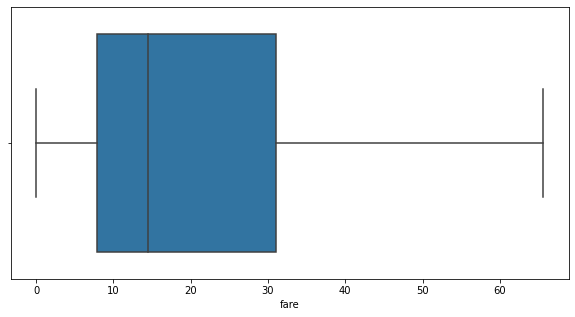

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='fare', data=df);

In [27]:
df.age = df.age.fillna(value=df.age.mean())

In [28]:
X = df.loc[:, 'pclass':]
y = df.loc[:, 'survived']

In [29]:
X = X.values
y = y.values

In [30]:
X

array([[ 3.        ,  1.        , 22.        , ...,  2.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  2.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        ,  0.        , 29.68869358, ...,  2.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 3.        ,  1.        , 32.        , ...,  2.        ,
         2.        ,  1.        ]])

In [31]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation='relu',input_dim=9))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1280      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_loss',
)

In [96]:
history = model.fit(X_train, y_train, batch_size=32, callbacks=[callback], validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.5889 - accuracy: 0.7329 - val_loss: 0.4803 - val_accuracy: 0.7902
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7821 - val_loss: 0.4280 - val_accuracy: 0.8252
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8049 - val_loss: 0.3987 - val_accuracy: 0.8322
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8067 - val_loss: 0.3909 - val_accuracy: 0.8392
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8155 - val_loss: 0.4000 - val_accuracy: 0.8182
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.8120 - val_loss: 0.3937 - val_accuracy: 0.8462
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8172 - val_loss: 0.3947 - val_accuracy: 0.8531
Epoch 8/100


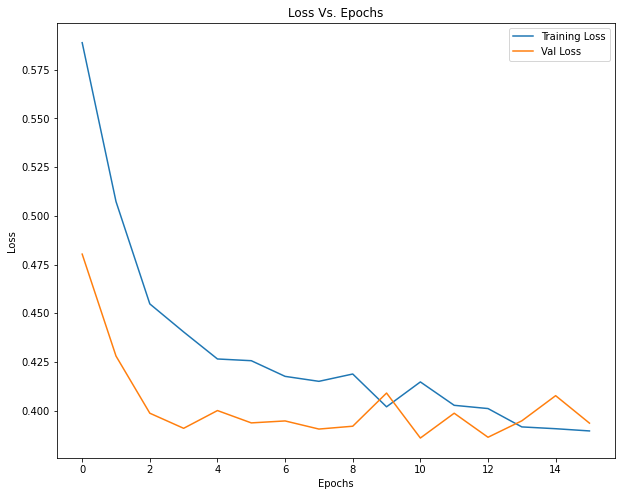

In [97]:
plt.figure(figsize=(10, 8));
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='val_loss');
plt.title('Loss Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Val Loss']);

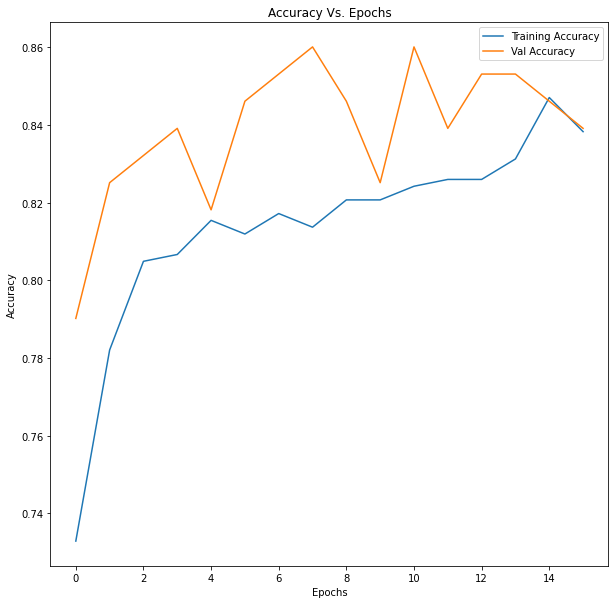

In [98]:
plt.figure(figsize=(10, 10));
plt.plot(history.history['accuracy'], label='train_acc');
plt.plot(history.history['val_accuracy'], label='val_acc');
plt.title('Accuracy Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Val Accuracy']);

In [99]:
pred = model.predict(X_test)

In [100]:
predic = []
for i in pred:
    if i > 0.5:
        predic.append(1)
    else:
        predic.append(0)

In [101]:
predic = np.array(predic)

----------------------------------------------------Accuracy------------------------------------------------------
0.8100558659217877

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


-------------------------------------------------Confustion Metrics----------------------------------------------------


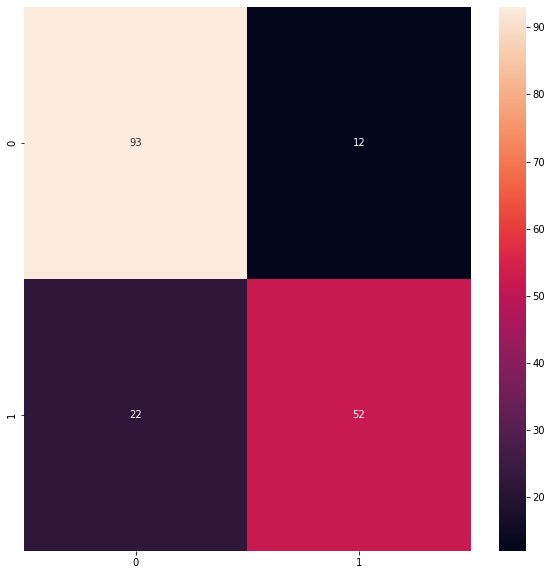

In [102]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, predic))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, predic))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, predic), annot=True);